# LOGISTIC REGRESSION (MULTICLASS)

IDENTIFYING HANDWRITTEN DIGITS 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits


In [3]:
digits = load_digits()

DESCRIBING THE DIGITS 

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

THE 8*8 IMAGE OF THE DATASET DIGIRS IS REPRESENTED AS THE ARRAY ABOVE

<Figure size 640x480 with 0 Axes>

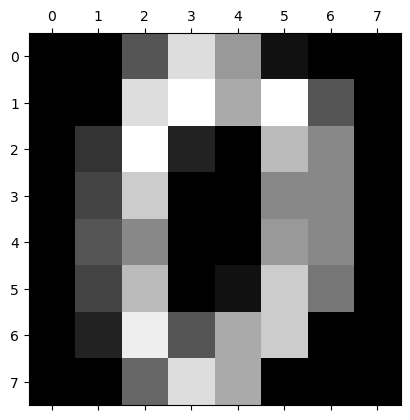

In [10]:
plt.gray()
plt.matshow(digits.images[0])

FOR PRINITNG FIRST 5 IMAGES

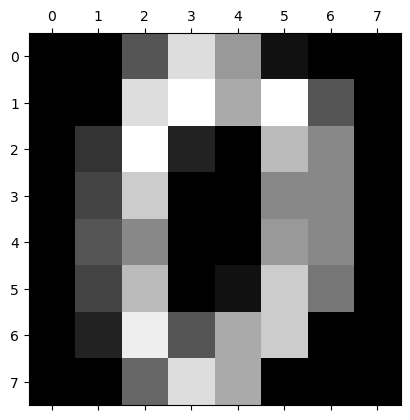

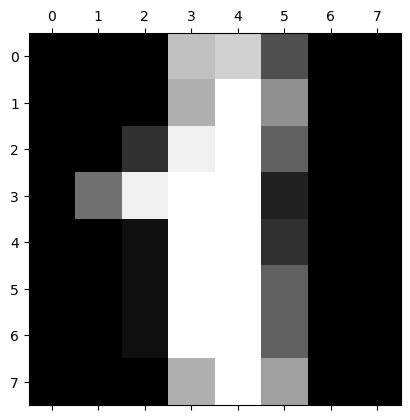

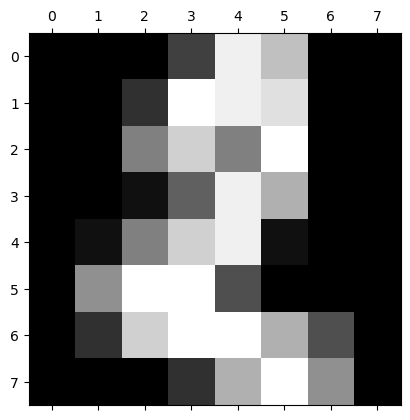

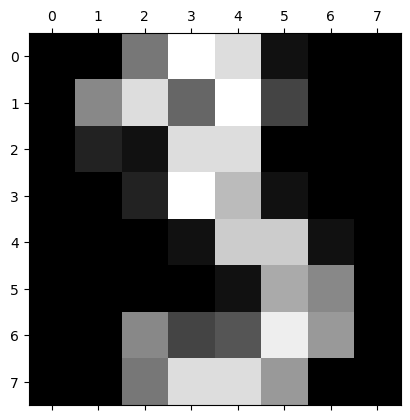

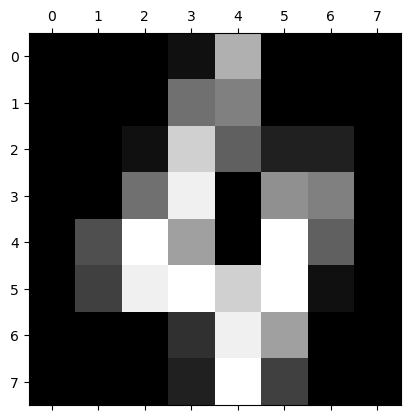

In [13]:
for i in range(5):
    plt.matshow(digits.images[i])

In [15]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

THE ABOVE OUTPUT TELLS THE IMAGES PRINTED ABOVE ARE IN A SEQUENCE

TRAINING THE MODEL

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(digits.data,digits.target,test_size = 0.2)

FROM THIS ABOVE COMMAND WE DIVIDES TO TRAIN AND TEST SET TO AVOID OVER FITTING THE MODEL BY BIASING THE TRAINED DATA AND HENCE WE USE THE ABOVE TRAIN TEST SPLIT METHOD

In [23]:
len(X_train)

1437

In [26]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

reg.fit(X_train,Y_train)
reg.score(X_test,Y_test)

C:\ProgramData\anaconda3\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

THE ACCURACY IS 97%

PICKING UP A RANDOM SAMPLE

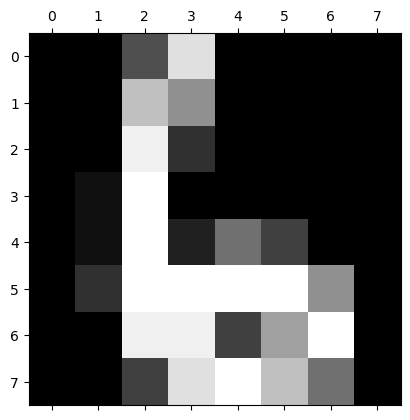

In [28]:
plt.matshow(digits.images[67])

In [30]:
digits.target[67]

6

WE USE DIGITS.DATA AS THE MODEL IS DESIGNED TO HANDLE NUMERIC DATA 

In [33]:
reg.predict([digits.data[67]])

array([6])

FINDING WHERE THE MODEL IS NOT PREDICTING ACCURATELY

# CONFUSION MATRIX

In [39]:
Y_predicted = reg.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_predicted)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 34,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0,  0, 37]], dtype=int64)

REPRESENTING THE ABOVE MATRIX USING MATPLOTLIB 


Text(95.72222222222221, 0.5, 'Truth')

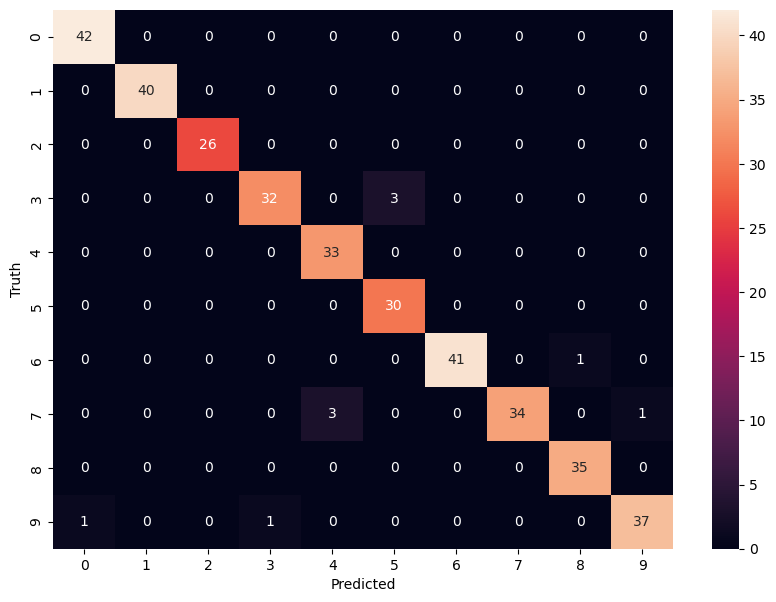

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

THE ABOVE HEAT MAPS TELLS THE INSTANCES AT WHICH THE MODEL IS NOT PERFORMING BETTER